# Preprocessing of the dataset

## 1: Importing the libraries

In [817]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

## 2: Importing the dataset

In [818]:
df = pd.read_csv(r'../data/original_data.csv')
test = pd.read_csv(r'../data/test_set.csv', sep=';')

print(df.head())



   ADR_SECTEUR  ANNEEDEPLANTATION ANNEEREALISATIONDIAGNOSTIC  \
0            5               2014                       2014   
1            3               2004                       2013   
2            3               2004                          ?   
3            2               2004                       2014   
4            1               2004                       2013   

  ANNEETRAVAUXPRECONISESDIAG      CODE CODE_PARENT  \
0                       2019  ESP33155      ESP385   
1                          ?   ESP2079      ESP116   
2                       2014  ESP26205      ESP635   
3                       2014   ESP7496      ESP109   
4                          ?   ESP2547      ESP194   

                 CODE_PARENT_DESC DIAMETREARBREAUNMETRE       ESPECE  \
0     R D Fontanelle ang Essen JO            10 à 20 cm      cordata   
1  Crs Libération Beauvert Alliés            30 à 40 cm   acerifolia   
2   Pl R Frappat ang Eaux Claires            10 à 20 cm  grandiflora   
3 

## 3: Deleting the columns that are not required

In [819]:
df = df.drop(columns=['ADR_SECTEUR', 'CODE', 'CODE_PARENT_DESC', 'IDENTIFIANTPLU', 'IDENTIFIANTPLU', 'STADEDEDEVELOPPEMENT','SOUS_CATEGORIE','Racine','Tronc', 'Collet', 'Houppier',])
test = test.drop(columns=['ADR_SECTEUR', 'CODE', 'CODE_PARENT_DESC', 'IDENTIFIANTPLU', 'IDENTIFIANTPLU', 'STADEDEDEVELOPPEMENT','SOUS_CATEGORIE',])


### Schema of the dataset
| VARIABLE                              | TYPE       | EXEMPLE                                   | TRANSFORMATION        |
|---------------------------------------|------------|-------------------------------------------|-----------------------|
| ANNEEDEPLANTATION                     | numérique  | 2014                                      | /                     |
| ANNEEREALISATIONDIAGNOSTIC           | numérique  | 2014                                      | /                     |
| ANNEETRAVAUXPRECONISESDIAG           | numérique  | 2019                                      | /                     |
| CODE_PARENT                           | nominale   | ESP385                                    | Label Encoding        |
| DIAMETREARBREAUNMETRE                 | ordinale   | 10 à 20 cm                               | Ordinal Encoding      |
| ESPECE                                | nominale   | cordata                                   | Label Encoding        |
| FREQUENTATIONCIBLE                    | ordinale   | passages fréquents ou arrêts             | Ordinal Encoding      |
| GENRE_BOTA                            | nominale   | Alnus                                     | Label Encoding        |
| INTITULEPROTECTIONPLU                 | nominale   | L 1231.7                                  | One-Hot Encoding      |
| NOTEDIAGNOSTIC                        | ordinale   | Arbre d'avenir incertain                  | Ordinal Encoding      |
| PRIORITEDERENOUVELLEMENT              | ordinale   | de 11 à 20 ans                           | Ordinal Encoding      |
| RAISONDEPLANTATION                    | nominale   | Nouveau                                   | Label Encoding        |
| REMARQUES                             | textuelle  | var. Wieri                                | /                     |
| SOUS_CATEGORIE_DESC                   | nominale   | Arbre d'enceintes fermées                 | One-Hot Encoding      |
| STADEDEVELOPPEMENTDIAG                | ordinale   | Arbre adulte                              | Ordinal Encoding      |
| TRAITEMENTCHENILLES                   | ordinale   | Moyenne                                   | Ordinal Encoding      |
| TRAVAUXPRECONISESDIAG                 | nominale   | Taille formation et mise au gabarit      | Label Encoding        |
| TROTTOIR                              | binaire    | non                                       | One-Hot Encoding      |
| TYPEIMPLANTATIONPLU                   | nominale   | Alignement                                | Label Encoding        |
| VARIETE                               | nominale   | Pendula                                   | One-Hot Encoding      |
| VIGUEUR                               | ordinale   | vigueur intermédiaire                     | Ordinal Encoding      |


## 4: Checking for missing values

In [820]:
df.replace('?', np.nan, inplace=True)
missing_values = df.isna().sum()
test.replace('?', np.nan, inplace=True)
test_missing_values = test.isna().sum()
print(missing_values)
print(test_missing_values)

ANNEEDEPLANTATION                 0
ANNEEREALISATIONDIAGNOSTIC        8
ANNEETRAVAUXPRECONISESDIAG     4511
CODE_PARENT                       0
DIAMETREARBREAUNMETRE            67
ESPECE                         1018
FREQUENTATIONCIBLE                1
GENRE_BOTA                        0
INTITULEPROTECTIONPLU         15014
NOTEDIAGNOSTIC                   40
PRIORITEDERENOUVELLEMENT        127
RAISONDEPLANTATION            15145
REMARQUES                     11176
SOUS_CATEGORIE_DESC               0
STADEDEVELOPPEMENTDIAG           13
TRAITEMENTCHENILLES           14287
TRAVAUXPRECONISESDIAG          4525
TROTTOIR                          0
TYPEIMPLANTATIONPLU           15014
VARIETE                       13212
VIGUEUR                          11
coord_x                           0
coord_y                           0
DEFAUT                            0
dtype: int64
ANNEEDEPLANTATION                0
ANNEEREALISATIONDIAGNOSTIC       2
ANNEETRAVAUXPRECONISESDIAG    1503
CODE_PARENT       

## 5: Dealing with missing values

In [821]:
# Fonction pour corriger les valeurs manquantes
def impute_missing_values(df):
    for column in df.columns:
        # Vérifie si la colonne est censée être numérique
        if column in ['ANNEEDEPLANTATION', 'ANNEEREALISATIONDIAGNOSTIC', 'ANNEETRAVAUXPRECONISESDIAG']:
            # Convertit la colonne en numérique, remplaçant les valeurs non numériques par NaN
            df[column] = pd.to_numeric(df[column], errors='coerce')
            mean_value = round(df[column].mean())
            df[column] = df[column].fillna(mean_value)
        else:
            missing_percentage = df[column].isnull().mean() * 100
            if missing_percentage > 3:
                df[column] = df[column].fillna('valeur manquante')
            else:
                mode_value = df[column].mode()[0]
                df[column] = df[column].fillna(mode_value)


# Appel de la fonction
impute_missing_values(df)
impute_missing_values(test)

##  6 Transformation de variable catégorielle en variable numérique

CODE_PARENT

In [822]:
from sklearn.preprocessing import LabelEncoder

# Création d'un objet LabelEncoder
le_code_parent = LabelEncoder()

# Application du label encoding sur la colonne CODE_PARENT
df['CODE_PARENT'] = le_code_parent.fit_transform(df['CODE_PARENT'])
test['CODE_PARENT'] = le_code_parent.fit_transform(test['CODE_PARENT'])




DIAMETREARBREAUNMETRE

In [823]:

# Définition de la correspondance entre les valeurs de la colonne DIAMETREARBREAUNMETRE et les valeurs ordinales
ordinal_mapping_diametre_arbre = {
    '0 à 10 cm': 1,
    '10 à 20 cm': 2,
    '20 à 30 cm': 3,
    '30 à 40 cm': 4,
    '40 à 50 cm': 5,
    '50 à 60 cm': 6,
    '60 à 70 cm': 7,
    '70 à 80 cm': 8,
    '80 à 90 cm': 9,
    '90 à 100 cm': 10,
    '100 à 110 cm': 11,
    '110 à 120 cm': 12,
    '120 à 130 cm': 13,
    '130 à 140 cm': 14,
    '140 à 150 cm': 15,
    '150 à 160 cm': 16,
    '160 à 170 cm': 17,
    '170 à 180 cm': 18,
    '180 à 190 cm': 19
}

# Application de l'ordinal encoding sur la colonne DIAMETREARBREAUNMETRE
df['DIAMETREARBREAUNMETRE'] = df['DIAMETREARBREAUNMETRE'].map(ordinal_mapping_diametre_arbre)
test['DIAMETREARBREAUNMETRE'] = test['DIAMETREARBREAUNMETRE'].map(ordinal_mapping_diametre_arbre )



ESPECE

In [824]:

# Création d'un objet LabelEncoder
le_espece = LabelEncoder()

# Application du label encoding sur la colonne ESPECE
df['ESPECE'] = le_espece.fit_transform(df['ESPECE'])
test['ESPECE'] = le_espece.fit_transform(test['ESPECE'])



FREQUENTATIONCIBLE

In [825]:

# Définition de la correspondance entre les valeurs de la colonne FREQUENTATIONCIBLE et les valeurs ordinales
ordinal_mapping_frequentation_cible = {
    'quelques passages': 1,
    'passages fréquents ou arrêts': 2,
    'passages fréquents et arrêts fréquents': 3
}

# Application de l'ordinal encoding sur la colonne FREQUENTATIONCIBLE
df['FREQUENTATIONCIBLE'] = df['FREQUENTATIONCIBLE'].map(ordinal_mapping_frequentation_cible)
test['FREQUENTATIONCIBLE'] = test['FREQUENTATIONCIBLE'].map(ordinal_mapping_frequentation_cible)



GENRE_BOTA

In [826]:


# Création d'un objet LabelEncoder
le_genre_bota = LabelEncoder()

# Application du label encoding sur la colonne GENRE_BOTA
df['GENRE_BOTA'] = le_genre_bota.fit_transform(df['GENRE_BOTA'])
test['GENRE_BOTA'] = le_genre_bota.fit_transform(test['GENRE_BOTA'])



INTITULEPROTECTIONPLU

In [827]:

# Application du one-hot encoding sur la colonne INTITULEPROTECTIONPLU
df = pd.get_dummies(df, columns=['INTITULEPROTECTIONPLU'])
test = pd.get_dummies(test, columns=['INTITULEPROTECTIONPLU'])



NOTEDIAGNOSTIC

In [828]:


# Définition de la correspondance entre les valeurs de la colonne NOTEDIAGNOSTIC et les valeurs ordinales
ordinal_mapping_note_diagnostic = {
    'Arbre davenir normal': 1,
    'Arbre davenir incertain': 2,
    'Arbre à abattre dans les 10 ans': 3,
    'Arbre à abattre dans les 5 ans': 4,
    'Arbre à abattre immédiatement': 5
}

# Application de l'ordinal encoding sur la colonne NOTEDIAGNOSTIC
df['NOTEDIAGNOSTIC'] = df['NOTEDIAGNOSTIC'].map(ordinal_mapping_note_diagnostic)
test['NOTEDIAGNOSTIC'] = test['NOTEDIAGNOSTIC'].map(ordinal_mapping_note_diagnostic)



PRIORITEDERENOUVELLEMENT

In [829]:


# Définition de la correspondance entre les valeurs de la colonne PRIORITEDERENOUVELLEMENT et les valeurs ordinales
ordinal_mapping_priorite_de_renouvellement = {
    'de 1 à 5 ans': 1,
    'de 6 à 10 ans': 2,
    'de 11 à 20 ans': 3,
    'plus de 20 ans': 4
}

# Application de l'ordinal encoding sur la colonne PRIORITEDERENOUVELLEMENT
df['PRIORITEDERENOUVELLEMENT'] = df['PRIORITEDERENOUVELLEMENT'].map(ordinal_mapping_priorite_de_renouvellement)

test['PRIORITEDERENOUVELLEMENT'] = test['PRIORITEDERENOUVELLEMENT'].map(ordinal_mapping_priorite_de_renouvellement)


RAISONDEPLANTATION

In [830]:


# Application du one-hot encoding sur la colonne RAISONDEPLANTATION
df = pd.get_dummies(df, columns=['RAISONDEPLANTATION'])
test = pd.get_dummies(test, columns=['RAISONDEPLANTATION'])



REMARQUES

In [816]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from nltk.util import ngrams
from collections import Counter
import joblib

# Supposons que les remarques sont dans une colonne nommée 'REMARQUES'
comments = df['REMARQUES'].astype(str)


# Fonction pour extraire les bigrammes
def extract_bigrams(text):
    tokens = text.split()
    bigrams = list(ngrams(tokens, 2))
    return [' '.join(bigram) for bigram in bigrams]

# Appliquer la fonction sur tous les commentaires
bigrams = comments.apply(extract_bigrams)

# Aplatir la liste de bigrammes et compter les fréquences
flat_bigrams = [bigram for sublist in bigrams for bigram in sublist]
bigram_counts = Counter(flat_bigrams)

# Convertir les bigrammes en DataFrame
bigram_df = pd.DataFrame(bigram_counts.items(), columns=['bigram', 'count'])
print("Bigrammes les plus fréquents :")
print(bigram_df.sort_values(by='count', ascending=False).head(10))

# Vectorisation des bigrammes
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(comments)

# Clustering KMeans
k = 200  # Nombre de clusters, ajustez-le selon vos besoins
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Ajouter les labels de cluster au DataFrame
df['remarquesclusterisées'] = kmeans.labels_

# Enregistrer le modèle KMeans
joblib.dump(kmeans, '../cluster/kmeans_model_remarques.pkl')

# Afficher les clusters
for i in range(k):
    print(f"\nCluster {i}:")
    print(df[df['remarquesclusterisées'] == i]['REMARQUES'].values)

df = df.drop(columns=['REMARQUES'])


Bigrammes les plus fréquents :
               bigram  count
0    valeur manquante  11176
38            de chat    363
37           Têtes de    251
107     Erreur espèce    172
83     Erreur essence    136
19             sur le    129
367            chat à    102
368      à entretenir    100
36         var. Wieri    100
176       de branches     98

Cluster 0:
['valeur manquante' 'valeur manquante' 'valeur manquante' ...
 'valeur manquante' 'valeur manquante' 'valeur manquante']

Cluster 1:
['Aire de jeux Casse de branches dorigine climatique.'
 'Casse de branches dorigine climatique Surveillance physiologique mécanique Aire de jeux'
 'Aire de jeux Casse de branches dorigine climatique.'
 'Casse de branches dorigine climatique aire de jeux.']

Cluster 2:
['Protection à mettre en place' 'Protection à mettre en place'
 'Protection  à mettre en place' 'Protection à mettre en place  Mulch'
 'Protection à mettre en place' 'Protection à mettre en place'
 'Protection à mettre en place' 'Protec

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Supposons que le modèle KMeans a déjà été entraîné et enregistré, et que df a été préparé
comments_test = test['REMARQUES'].astype(str)

# Charger le modèle KMeans sauvegardé
kmeans = joblib.load('../cluster/kmeans_model_remarques.pkl')

# Charger le vectorizer utilisé précédemment
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Appliquer le vectorizer sur le jeu de données original pour reconstruire l'espace vectoriel
X_train = vectorizer.fit_transform(df['REMARQUES'].astype(str))  # Vectorisation des données d'entraînement

# Appliquer la vectorisation sur les remarques du jeu de test (en utilisant transform, pas fit_transform)
X_test = vectorizer.transform(comments_test)

# Prédire les clusters pour le jeu de test
test['remarquesclusterisées'] = kmeans.predict(X_test)

# Afficher les clusters pour les données de test
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i}:")
    print(test[test['remarquesclusterisées'] == i]['REMARQUES'].values)

# Optionnel : Si vous souhaitez enlever la colonne 'REMARQUES' du DataFrame test
test = test.drop(columns=['REMARQUES'])

# Afficher le DataFrame test avec les clusters
print(test.head())


SOUS_CATEGORIE_DESC

In [831]:


# Application du one-hot encoding sur la colonne SOUS_CATEGORIE_DESC
df = pd.get_dummies(df, columns=['SOUS_CATEGORIE_DESC'])
test = pd.get_dummies(test, columns=['SOUS_CATEGORIE_DESC'])



STADEDEVELOPPEMENT DIAG

In [832]:

# Définition de la correspondance entre les valeurs de la colonne STADEDEVELOPPEMENTDIAG et les valeurs ordinales
ordinal_mapping_stade = {
    'Arbre jeune': 1,
    'Arbre adulte': 2,
    'Arbre vieillissant': 3
}

# Application de l'ordinal encoding sur la colonne STADEDEVELOPPEMENTDIAG
df['STADEDEVELOPPEMENTDIAG'] = df['STADEDEVELOPPEMENTDIAG'].map(ordinal_mapping_stade)
test['STADEDEVELOPPEMENTDIAG'] = test['STADEDEVELOPPEMENTDIAG'].map(ordinal_mapping_stade)


TRAITEMENTCHENILLES

In [833]:


# Définition de la correspondance entre les valeurs de la colonne TRAITEMENTCHENILLES et les valeurs ordinales
ordinal_mapping_traitement = {
    'valeur manquante': 0,
    'Basse': 1,
    'Moyenne': 2,
    'Haute': 3
}

# Application de l'ordinal encoding sur la colonne TRAITEMENTCHENILLES
df['TRAITEMENTCHENILLES'] = df['TRAITEMENTCHENILLES'].map(ordinal_mapping_traitement)
test['TRAITEMENTCHENILLES'] = test['TRAITEMENTCHENILLES'].map(ordinal_mapping_traitement)

TRAVAUXPRECONISESDIAG

In [834]:

# Création d'un objet LabelEncoder
le_travaux_preconises_diag = LabelEncoder()

# Application du label encoding sur la colonne TRAVAUXPRECONISESDIAG
df['TRAVAUXPRECONISESDIAG'] = le_travaux_preconises_diag.fit_transform(df['TRAVAUXPRECONISESDIAG'])
test['TRAVAUXPRECONISESDIAG'] = le_travaux_preconises_diag.fit_transform(test['TRAVAUXPRECONISESDIAG'])


TROTTOIR

In [835]:


# Création d'un objet LabelEncoder
le_trottoir = LabelEncoder()

# Application du label encoding sur la colonne TROTTOIR
df['TROTTOIR'] = le_trottoir.fit_transform(df['TROTTOIR'])
test['TROTTOIR'] = le_trottoir.fit_transform(test['TROTTOIR'])


TYPEIMPLANTATIONPLU

In [836]:


# Application du one-hot encoding sur la colonne TYPEIMPLANTATIONPLU
df = pd.get_dummies(df, columns=['TYPEIMPLANTATIONPLU'])
test = pd.get_dummies(test, columns=['TYPEIMPLANTATIONPLU'])



VARIETE

In [837]:


# Création d'un objet LabelEncoder
le_variete = LabelEncoder()

# Application du label encoding sur la colonne VARIETE
df['VARIETE'] = le_variete.fit_transform(df['VARIETE'])
test['VARIETE'] = le_variete.fit_transform(test['VARIETE'])


VIGUEUR

In [838]:

# Définition de la correspondance entre les valeurs de la colonne VIGUEUR et les valeurs ordinales
ordinal_mapping_vigoureux = {
    'vigoureux': 4,
    'vigueur intermédiaire': 3,
    'vieillissement': 2,
    'déperissement': 1
}

# Application de l'ordinal encoding sur la colonne VIGUEUR
df['VIGUEUR'] = df['VIGUEUR'].map(ordinal_mapping_vigoureux)
test['VIGUEUR'] = test['VIGUEUR'].map(ordinal_mapping_vigoureux)

COORDONNÉES


Indice de silhouette pour 400 clusters : 0.4500348732061448


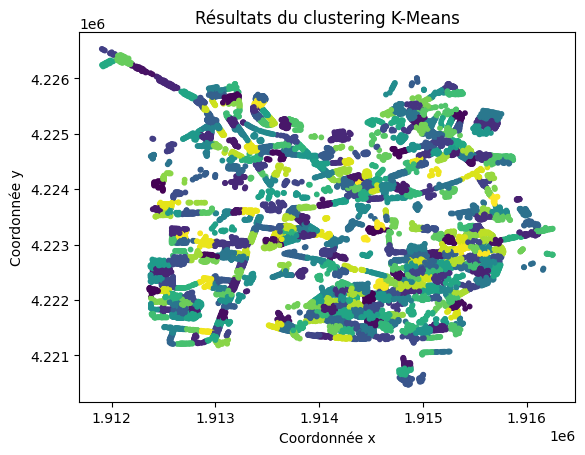

['../cluster/kmeans_model_coordonnées.pkl']

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import joblib

# Supposons que vous ayez déjà un DataFrame 'df' avec les colonnes 'coord_x' et 'coord_y'

# Appliquer K-Means avec 400 clusters
kmeans = KMeans(n_clusters=400, random_state=42)
coordonnees = df[['coord_x', 'coord_y']].values
kmeans.fit(coordonnees)

# Récupérer les labels des clusters
clusters = kmeans.labels_

# Calculer l'indice de silhouette pour évaluer la qualité du clustering
score = silhouette_score(coordonnees, clusters)
print(f'Indice de silhouette pour 400 clusters : {score}')

# Ajouter les clusters au DataFrame
df['cluster'] = clusters

# Visualisation des clusters
plt.scatter(df['coord_x'], df['coord_y'], c=df['cluster'], cmap='viridis', s=10)
plt.title('Résultats du clustering K-Means')
plt.xlabel('Coordonnée x')
plt.ylabel('Coordonnée y')
plt.show()

# Supprimer les colonnes 'coord_x' et 'coord_y' puisque les clusters les remplacent
df = df.drop(columns=['coord_x', 'coord_y'])

# Réorganiser les colonnes en déplaçant 'cluster' à l'index initial des coordonnées (ici index 27)
col_index = df.columns.get_loc('cluster')
cols = df.columns.tolist()
cluster_col = cols.pop(col_index)  # Retirer la colonne 'cluster' de son emplacement actuel
cols.insert(27, cluster_col)  # Insérer 'cluster' à l'emplacement désiré

# Réorganiser le DataFrame
df = df[cols]

# Enregistrer le modèle KMeans pour les coordonnées
joblib.dump(kmeans, '../cluster/kmeans_model_coordonnées.pkl')




On normalise tout :

In [ ]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supposons que df est déjà défini

# Conversion des colonnes booléennes en entiers (0 et 1)
bool_columns = df.select_dtypes(include=['bool']).columns  # Sélectionne les colonnes booléennes
df[bool_columns] = df[bool_columns].astype(int)  # Convertit en int

# Sélection des colonnes numériques à standardiser (en excluant DEFAUT)
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns[numeric_columns != "DEFAUT"]  # Exclure la colonne DEFAUT

# Création de l'objet StandardScaler
scaler = StandardScaler()

# Standardisation des données
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Assurez-vous que la colonne DEFAUT est bien en entier (0 et 1)
df_scaled["DEFAUT"] = df_scaled["DEFAUT"].astype(int)  # Convertit en int

# Vérifiez les valeurs uniques dans DEFAUT pour vous assurer qu'elles sont bien 0 et 1
print(df_scaled["DEFAUT"].unique())


[0 1]


### Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Séparation des caractéristiques et de la cible
X = df_scaled.drop(columns=["DEFAUT"])  # Caractéristiques (features)
y = df_scaled["DEFAUT"]  # Cible (target)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier()
model.fit(X_train, y_train)




RandomForestClassifier()

In [ ]:
# Prédire les classes sur les données de test
y_pred = model.predict(X_test)

# Calcul des métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Affichage des résultats
print("Précision du modèle : {:.2f}%".format(accuracy * 100))
print("\nMatrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", class_report)


Précision du modèle : 87.41%

Matrice de confusion :
 [[1945  146]
 [ 241  743]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      2091
           1       0.84      0.76      0.79       984

    accuracy                           0.87      3075
   macro avg       0.86      0.84      0.85      3075
weighted avg       0.87      0.87      0.87      3075



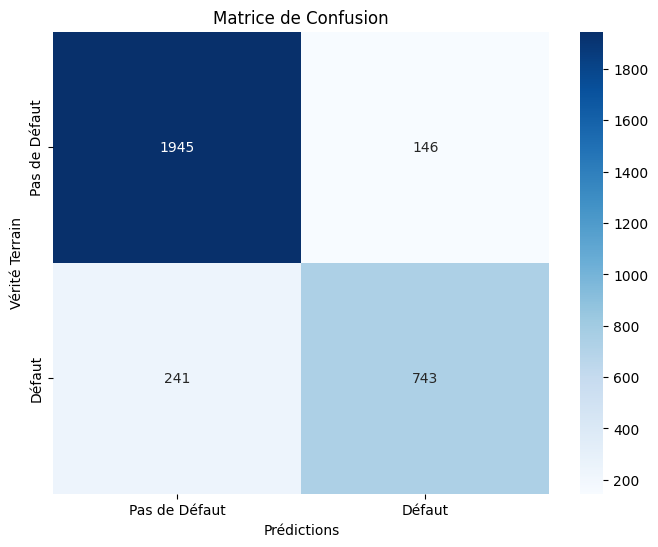

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pas de Défaut', 'Défaut'], yticklabels=['Pas de Défaut', 'Défaut'])
plt.ylabel('Vérité Terrain')
plt.xlabel('Prédictions')
plt.title('Matrice de Confusion')
plt.show()


In [ ]:
# Supposons que new_data est un DataFrame avec les mêmes caractéristiques que X_train
new_data_scaled = scaler.transform(new_data[numeric_columns])  # Ne pas inclure DEFAUT
predictions = model.predict(new_data_scaled)

# Affichage des prédictions
print("Prédictions sur les nouvelles données :", predictions)


NameError: name 'new_data' is not defined

In [ ]:
import joblib

# Sauvegarde du modèle
joblib.dump(model, 'random_forest_model.pkl')

# Chargement du modèle
loaded_model = joblib.load('random_forest_model.pkl')


In [ ]:
# Exporter le DataFrame en CSV
df_scaled.to_csv(r'../data/preprocessed_data.csv', index=False)
